In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('raw_data/Traffic_Violations.csv')
print(len(df))
column = pd.DataFrame({ 'column': df.columns})
column

D:\Anaconda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1018634


,column
0,Date Of Stop
1,Time Of Stop
2,Agency
3,SubAgency
4,Description
5,Location
6,Latitude
7,Longitude
8,Accident
9,Belts


In [3]:
tv_df = df[['Date Of Stop', 'Time Of Stop', 'Race', 'Gender','Driver State', 'DL State' ,'Alcohol', 'Description', 'Accident', 'Violation Type', 'Charge', 'Arrest Type']]
tv_df = tv_df.dropna()
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017690 entries, 0 to 1018633
Data columns (total 12 columns):
Date Of Stop      1017690 non-null object
Time Of Stop      1017690 non-null object
Race              1017690 non-null object
Gender            1017690 non-null object
Driver State      1017690 non-null object
DL State          1017690 non-null object
Alcohol           1017690 non-null object
Description       1017690 non-null object
Accident          1017690 non-null object
Violation Type    1017690 non-null object
Charge            1017690 non-null object
Arrest Type       1017690 non-null object
dtypes: object(12)
memory usage: 100.9+ MB


In [4]:

#tv_df['Year'] = pd.to_datetime(['Date Of Stop']).dt.year
tv_df['Date Of Stop'] = pd.to_datetime(tv_df['Date Of Stop'])
tv_df['Year'] = pd.to_datetime(tv_df['Date Of Stop']).dt.year
tv_df['Month'] = pd.to_datetime(tv_df['Date Of Stop']).dt.month
tv_df['Time Of Stop'] = pd.to_datetime(tv_df['Time Of Stop'], format='%H:%M:%S')
tv_df['Hour'] = tv_df['Time Of Stop'].dt.hour
tv_df.head()

,Date Of Stop,Time Of Stop,Race,Gender,Driver State,DL State,Alcohol,Description,Accident,Violation Type,Charge,Arrest Type,Year,Month,Hour
0,2013-09-24,1900-01-01 17:11:00,BLACK,M,MD,MD,No,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,No,Citation,13-401(h),A - Marked Patrol,2013,9,17
1,2012-12-20,1900-01-01 00:41:00,WHITE,M,MD,MD,No,DRIVING WHILE IMPAIRED BY ALCOHOL,No,Citation,21-902(b1),A - Marked Patrol,2012,12,0
2,2012-07-20,1900-01-01 23:12:00,ASIAN,F,MD,MD,No,FAILURE TO STOP AT STOP SIGN,No,Citation,21-707(a),A - Marked Patrol,2012,7,23
3,2012-03-19,1900-01-01 16:10:00,HISPANIC,M,VA,VA,No,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,No,Citation,21-1124.2(d2),A - Marked Patrol,2012,3,16
4,2014-12-01,1900-01-01 12:52:00,BLACK,F,MD,MD,No,FAILURE STOP AND YIELD AT THRU HWY,No,Citation,21-403(b),A - Marked Patrol,2014,12,12


In [5]:

date_df = tv_df[['Date Of Stop', 'Time Of Stop','Year', 'Month', 'Hour']]
first = date_df.loc[date_df['Year'] == 2012]
first_gf = first.groupby('Month')
second = date_df.loc[date_df['Year'] == 2013]
second_gf = second.groupby('Month')
third = date_df.loc[date_df['Year'] == 2014]
third_gf = third.groupby('Month')
fourth = date_df.loc[date_df['Year'] == 2015]
fourth_gf = fourth.groupby('Month')
fifth = date_df.loc[date_df['Year'] == 2016]
fifth_gf = fifth.groupby('Month')
total_df = pd.DataFrame({'Month': first_gf['Month'].groups, 'Count_2012': first_gf['Month'].count(), 
                         'Count_2013': second_gf['Month'].count(), 'Count_2014': third_gf['Month'].count(),
                        'Count_2015': fourth_gf['Month'].count(), 'Count_2016': fifth_gf['Month'].count()})

total_df = total_df.drop(['Month'], axis=1, inplace=False)
total_df.reset_index(level=0, inplace=True)

#Simple code to see the min and max values by year
print(total_df.loc[total_df['Count_2012'].idxmax()][0])
print(total_df.loc[total_df['Count_2013'].idxmax()][0])
print(total_df.loc[total_df['Count_2014'].idxmax()][0])
print(total_df.loc[total_df['Count_2015'].idxmax()][0])
print(total_df.loc[total_df['Count_2016'].idxmax()][0])
print(total_df.loc[total_df['Count_2012'].idxmin()][0])
print(total_df.loc[total_df['Count_2013'].idxmin()][0])
print(total_df.loc[total_df['Count_2014'].idxmin()][0])
print(total_df.loc[total_df['Count_2015'].idxmin()][0])
print(total_df.loc[total_df['Count_2016'].idxmin()][0])


5
5
5
4
3
1
2
1
2
12


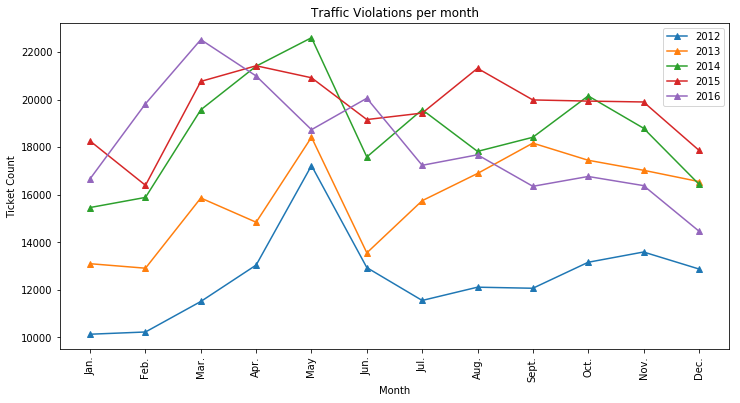

In [6]:
# Set x axis to numerical value for month
x_axis_data = np.arange(1,13,1)
x_axis_data
plt.figure(figsize=(12, 6))

plt.plot(x_axis_data,total_df['Count_2012'].values, marker="^", label='2012')
plt.plot(x_axis_data,total_df['Count_2013'].values, marker="^", label='2013')
plt.plot(x_axis_data,total_df['Count_2014'].values, marker="^", label='2014')
plt.plot(x_axis_data,total_df['Count_2015'].values, marker="^", label='2015')
plt.plot(x_axis_data,total_df['Count_2016'].values, marker="^", label='2016')

months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

plt.xticks(np.arange(min(x_axis_data), max(x_axis_data)+1, 1.0), months, rotation="vertical" )
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.title("Traffic Violations per month")
plt.xlabel("Month")
plt.ylabel("Ticket Count")

plt.savefig("Images/TrafficByMonth.png", bbox_inches='tight')
plt.show()

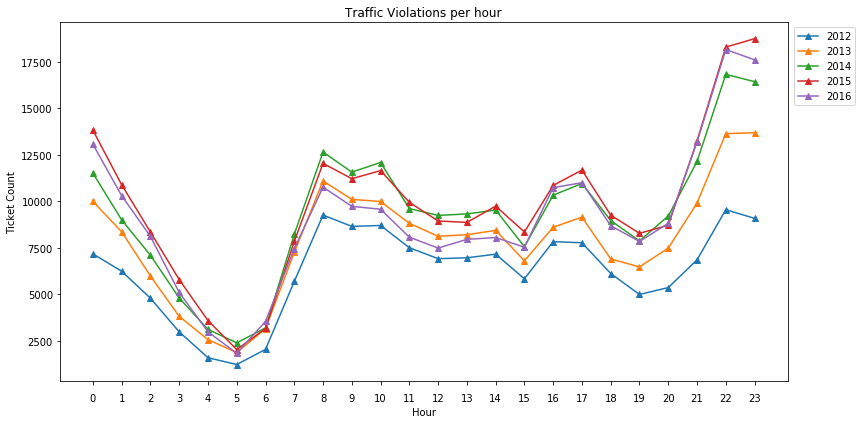

In [7]:
hour_2012 = first.groupby('Hour')
hour_2013 = second.groupby('Hour')
hour_2014 = third.groupby('Hour')
hour_2015 = fourth.groupby('Hour')
hour_2016 = fifth.groupby('Hour')

time_df = pd.DataFrame({'Hour': hour_2012['Hour'].groups, 'Count_2012': hour_2012['Hour'].count(), 
                         'Count_2013': hour_2013['Hour'].count(), 'Count_2014': hour_2014['Hour'].count(),
                        'Count_2015': hour_2015['Hour'].count(), 'Count_2016': hour_2016['Hour'].count()})
time_df = time_df.drop(['Hour'], axis=1, inplace=False)
time_df.reset_index(level=0, inplace=True)
x_axis = np.arange(0,24,1)
plt.figure(figsize=(12, 6))
plt.plot(x_axis,time_df['Count_2012'].values, marker="^", label='2012')
plt.plot(x_axis,time_df['Count_2013'].values, marker="^", label='2013')
plt.plot(x_axis,time_df['Count_2014'].values, marker="^", label='2014')
plt.plot(x_axis,time_df['Count_2015'].values, marker="^", label='2015')
plt.plot(x_axis,time_df['Count_2016'].values, marker="^", label='2016')
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.tick_params(axis='x', which='major',length=4, pad=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title("Traffic Violations per hour")
plt.xlabel("Hour")
plt.ylabel("Ticket Count")
plt.savefig("Images/TrafficByHour.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [8]:
#code to see which times are busiest
print(time_df.loc[time_df['Count_2012'].idxmax()][0])
print(time_df.loc[time_df['Count_2013'].idxmax()][0])
print(time_df.loc[time_df['Count_2014'].idxmax()][0])
print(time_df.loc[time_df['Count_2015'].idxmax()][0])
print(time_df.loc[time_df['Count_2016'].idxmax()][0])
print(time_df.loc[time_df['Count_2012'].idxmin()][0])
print(time_df.loc[time_df['Count_2013'].idxmin()][0])
print(time_df.loc[time_df['Count_2014'].idxmin()][0])
print(time_df.loc[time_df['Count_2015'].idxmin()][0])
print(time_df.loc[time_df['Count_2016'].idxmin()][0])

22
23
22
23
22
5
5
5
5
5
